# PCA and t-SNE
We will work on image data of digits and visualize them on 2 dimentional space.
- Data from sklearn.dataset and we will be considering 6 classes.

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import datasets, manifold, decomposition

In [2]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbours = 30

In [3]:
X.shape

(1083, 64)

## Observations
- There are 1083 images and each image has 64 features/dimensions (pixels)

## Decreasing the dimensionality from 64 to 2
- Compute t-SNE embedding
- Compute PCA Projections

In [4]:
print("Computing t-SNE embedding")
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
t1 = time()
tsne_time = t1 - t0
print(f"Time taken for t-SNE: {tsne_time}")
print(X_tsne)
print("*"*20)
print("Compute PCA projections")
t0 = time()
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
t1 = time()
pca_time = t1 - t0
print(f"Time taken for PCA: {pca_time}")
print(X_pca)
print("*"*20)

Computing t-SNE embedding
Time taken for t-SNE: 3.583798885345459
[[ 16.391212  -45.33681  ]
 [  5.513401   33.072216 ]
 [ -6.486735   29.378954 ]
 ...
 [ 31.360352    6.9738474]
 [ 35.26862     8.752878 ]
 [ 19.724216  -35.732067 ]]
********************
Compute PCA projections
Time taken for PCA: 0.004999637603759766
[[ 10.76255862 -24.73807   ]
 [ -0.62690611  26.83050076]
 [  1.68579888  12.29145552]
 ...
 [ 30.84986571   6.30638404]
 [ 32.14391365  10.57477563]
 [ 16.46964869 -21.3601361 ]]
********************


## Obervations
- Time taken for t-SNE is more 3.58 seconds whereas time taken by PCA is quite small 0.004 seconds

### Creating Scatterplot function to plot for both t-SNE and PCA

In [6]:
import seaborn as sns

def scatters(X, title=None):
    x1 = []
    x2 = []
    plt.figure(figsize=(10, 10))
    plt.title = title
    #  Because we have a two dimensions to plot we need x and y which are x1 and x2 respectively.  
    for i in X:
        x1.append(i[0])
        x2.append(i[1])
    sns.scatterplot(x=x1, y=x2)
    plt.show()

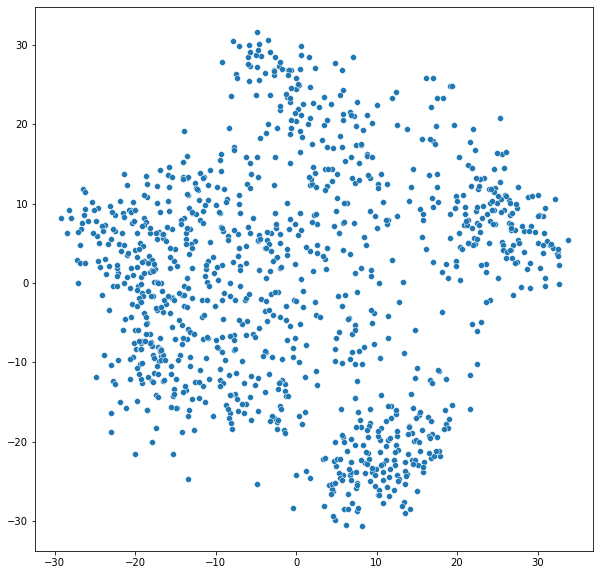

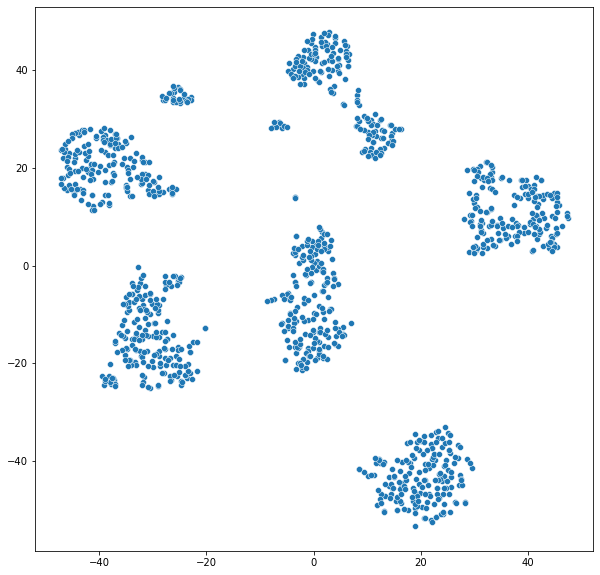

In [7]:
scatters(X_pca, "Principle Component Projection of Digits using PCA")
scatters(X_tsne, "t-SNE embedding of digits")

### Better Visualization with more information about the points

In [8]:
def plot_embeddings(x, title=None):
    print(x)
    x_min, x_max = np.min(x, 0), np.max(x, 0)
    # Scaling the values to be between 0 and 1
    x = (x - x_min)/(x_max - x_min)
    
    # Plotting
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(111)
    for i in range(x.shape[0]):
        plt.text(x[i, 0], x[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i]/10.),
                 fontdict={'weight':'bold', 'size': 9}
                 )
    if hasattr(offsetbox, "AnnotationBbox"):
        # Thumbnails with matplotlib > 1.0  
        show_images = np.array([[1., 1.]])
        for i in range(x.shape[0]):
            distance = np.sum((x[i]-show_images)**2, 1)
            # Do not show images for points which are too close
            if np.min(distance) < 4e-3:
                continue
            show_images = np.r_[show_images, [x[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), x[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title = title
    plt.show()

[[ 10.76255862 -24.73807   ]
 [ -0.62690611  26.83050076]
 [  1.68579888  12.29145552]
 ...
 [ 30.84986571   6.30638404]
 [ 32.14391365  10.57477563]
 [ 16.46964869 -21.3601361 ]]


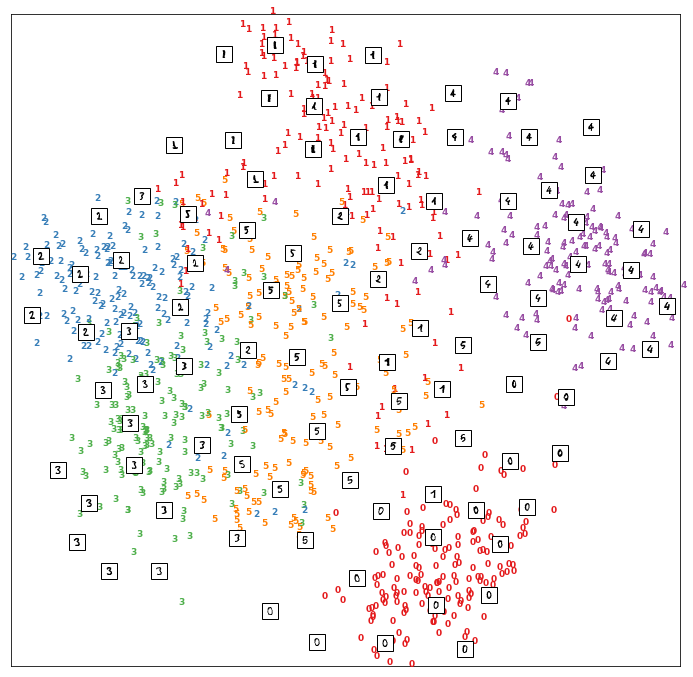

[[ 16.391212  -45.33681  ]
 [  5.513401   33.072216 ]
 [ -6.486735   29.378954 ]
 ...
 [ 31.360352    6.9738474]
 [ 35.26862     8.752878 ]
 [ 19.724216  -35.732067 ]]


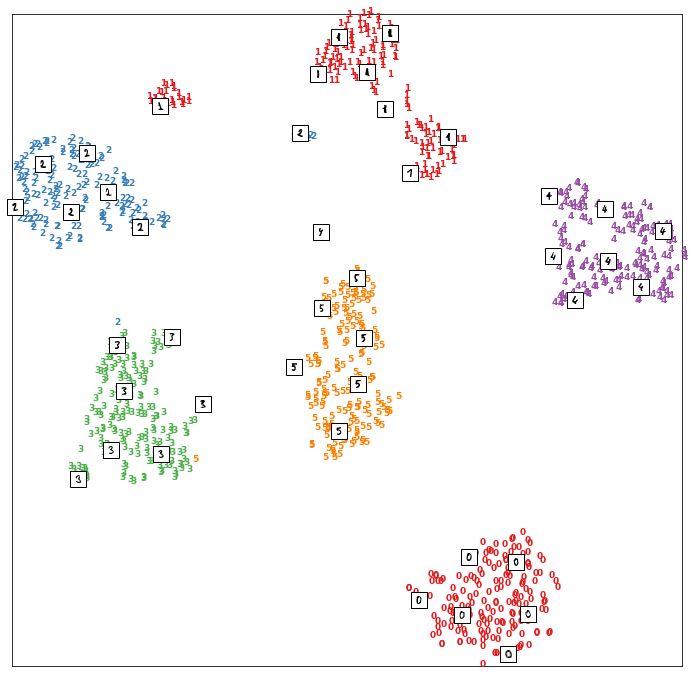

In [9]:
plot_embeddings(X_pca, "PCA digits projection{time %.2fs}"%(pca_time))
plot_embeddings(X_tsne, "t-SNE digits embedding {time %.2fs}"%(tsne_time))

# Final Observations

- t-SNE shows better results but has very high computation time and is not scalable
- PCA gives less accurate results but processing time is better.

### With Complex large and high dimensional dataset PCA might be a better candidate for visualization, t-SNE will not be as scalable.